In [3]:
import pandas as pd
import numpy as np
import requests
import re
import seaborn
import matplotlib.pyplot as plt
import tensorflow as tf


In [4]:
data = pd.read_csv('/home/devops/Downloads/MLOP-s-POC-AWS-master/iris.csv',
names=['sepal_length','sepal_width','petal_length','petal_width','species'])
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


/home/devops/.local/lib/python3.6/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


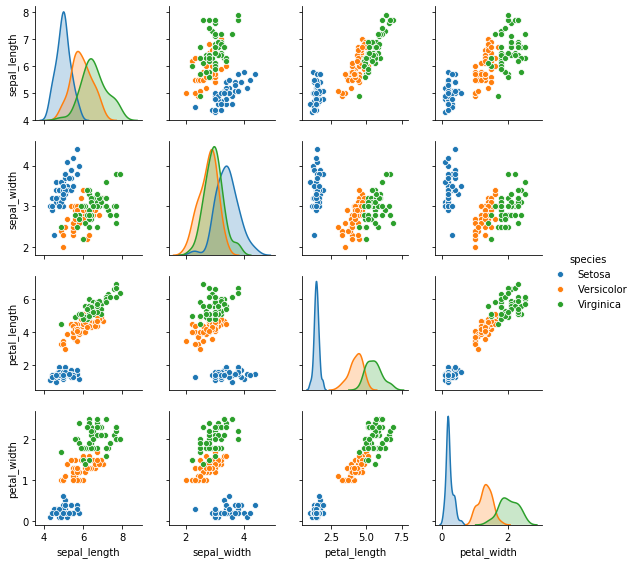

In [5]:
seaborn.pairplot(data, hue="species", size=2, diag_kind="kde")
plt.show()

In [6]:
from sklearn.preprocessing import LabelBinarizer
species_lb = LabelBinarizer()
Y = species_lb.fit_transform(data.species.values)

In [7]:
from sklearn.preprocessing import normalize
FEATURES = data.columns[0:4]
X_data = data[FEATURES].as_matrix()
X_data = normalize(X_data)

/home/devops/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_data, Y, test_size=0.3, random_state=1)
X_train.shape

(105, 4)

In [9]:
import tensorflow as tf
# Parameters
learning_rate = 0.01
training_epochs = 15

In [10]:
# Neural Network Parameters
n_hidden_1 = 256 # 1st layer number of neurons
n_hidden_2 = 128 # 1st layer number of neurons
n_input = X_train.shape[1] # input shape (105, 4)
n_classes = y_train.shape[1] # classes to predict

In [11]:
# Inputs
X = tf.placeholder("float", shape=[None, n_input])
y = tf.placeholder("float", shape=[None, n_classes])
# Dictionary of Weights and Biases
weights = {
    'h1': tf.Variable(tf.random_normal([n_input, n_hidden_1])),
    'h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_hidden_2, n_classes]))
}
biases = {
    'b1': tf.Variable(tf.random_normal([n_hidden_1])),
    'b2': tf.Variable(tf.random_normal([n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_classes]))
}

In [12]:
    # Model Forward Propagation step
    def forward_propagation(x):
        # Hidden layer1
        layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
        layer_1 = tf.nn.relu(layer_1)
        
        layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
        layer_2 = tf.nn.relu(layer_2)
        # Output fully connected layer
        out_layer = tf.matmul(layer_2, weights['out']) + biases['out'] 
        return out_layer
    # Model Outputs
    yhat = forward_propagation(X)
    ypredict = tf.argmax(yhat, axis=1)

In [13]:
    # Backward propagation
    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y, logits=yhat))
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    #optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
    train_op = optimizer.minimize(cost)

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



In [14]:
    # Initializing the variables
    init = tf.global_variables_initializer()
    from datetime import datetime
    startTime = datetime.now()
    with tf.Session() as sess:
        sess.run(init)
        
        #writer.add_graph(sess.graph)
        #EPOCHS
        for epoch in range(training_epochs):
            #Stochasting Gradient Descent
            for i in range(len(X_train)):
                summary = sess.run(train_op, feed_dict={X: X_train[i: i + 1], y: y_train[i: i + 1]})
            
            train_accuracy = np.mean(np.argmax(y_train, axis=1) == sess.run(ypredict, feed_dict={X: X_train, y: y_train}))
            test_accuracy  = np.mean(np.argmax(y_test, axis=1) == sess.run(ypredict, feed_dict={X: X_test, y: y_test}))
                    
            print("Epoch = %d, train accuracy = %.2f%%, test accuracy = %.2f%%" % (epoch + 1, 100. * train_accuracy, 100. * test_accuracy))
            #print("Epoch = %d, train accuracy = %.2f%%" % (epoch + 1, 100. * train_accuracy))
        sess.close()
    print("Time taken:", datetime.now() - startTime)

Epoch = 1, train accuracy = 69.52%, test accuracy = 60.00%
Epoch = 2, train accuracy = 95.24%, test accuracy = 93.33%
Epoch = 3, train accuracy = 91.43%, test accuracy = 93.33%
Epoch = 4, train accuracy = 92.38%, test accuracy = 95.56%
Epoch = 5, train accuracy = 91.43%, test accuracy = 95.56%
Epoch = 6, train accuracy = 93.33%, test accuracy = 93.33%
Epoch = 7, train accuracy = 90.48%, test accuracy = 91.11%
Epoch = 8, train accuracy = 93.33%, test accuracy = 95.56%
Epoch = 9, train accuracy = 94.29%, test accuracy = 95.56%
Epoch = 10, train accuracy = 92.38%, test accuracy = 95.56%
Epoch = 11, train accuracy = 94.29%, test accuracy = 95.56%
Epoch = 12, train accuracy = 92.38%, test accuracy = 91.11%
Epoch = 13, train accuracy = 93.33%, test accuracy = 97.78%
Epoch = 14, train accuracy = 92.38%, test accuracy = 93.33%
Epoch = 15, train accuracy = 92.38%, test accuracy = 91.11%
Time taken: 0:00:01.951469


In [15]:
# preprocess the data
species={'Setosa':0,'Versicolor':1,'Virginica':2}
data.species=[species[item] for item in data.species]
data


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [16]:
df = pd.DataFrame(data) 
fun=df[['sepal_length','sepal_width','petal_length','petal_width']]

cls=df[['species']]

In [17]:
X1_train, X1_test,y1_train, y1_test  = train_test_split(fun,cls, test_size=0.3, random_state=1)

X1_train=X1_train.reset_index(drop=True)
X1_test=X1_test.reset_index(drop=True)
y1_train=y1_train.reset_index(drop=True)
y1_test=y1_test.reset_index(drop=True)
y1_train

,species
0,2
1,0
2,0
3,0
4,1
...,...
100,2
101,2
102,1
103,2


In [18]:
# Specify that all features have real-value data
feature_columns = [tf.contrib.layers.real_valued_column("", dimension=4)]

# Build 3 layer DNN with 10, 20, 10 units respectively.
classifier = tf.contrib.learn.DNNClassifier(feature_columns=feature_columns,
                                        hidden_units=[10, 20, 10],
                                        n_classes=3,
                                        model_dir="iris_model")

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

Instructions for updating:
Please switch to tf.contrib.estimator.*_head.
Instructions for updating:
Please replace uses of any Estimator from tf.contrib.learn with an Estimator from tf.estimator.*
Instructions for updating:
When switching to tf.estimator.Estimator, use tf.estimator.RunConfig instead.
INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7fc4032f2860>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', 

In [19]:
# Fit model.
classifier.fit(x=X1_train, y=y1_train, steps=2000)

Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available in the SKCompat class, Estimator will only accept input_fn.
Example conversion:
  est = Estimator(...) -> est = SKCompat(Estimator(...))
Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available in the SKCompat class, Estimator will only accept input_fn.
Example conversion:
  est = Estimator(...) -> est = SKCompat(Estimator(...))
Instructions for updating:
Please switch to the Estimator interface.
Instructions for updating:
Please use tensorflow/transform or tf.data.
Instructions for updating:
Please access pandas data directly.
Instructions for updating:
Please access pandas data directly.
Instructions for updating:
Please use tensorflow/transform or tf.data.
Instructions for updating:
Please convert numpy dtypes 

INFO:tensorflow:Create CheckpointSaverHook.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into iris_model/model.ckpt.
INFO:tensorflow:loss = 1.284838, step = 1
INFO:tensorflow:global_step/sec: 125.687
INFO:tensorflow:loss = 0.12906997, step = 101 (0.804 sec)
INFO:tensorflow:global_step/sec: 359.884
INFO:tensorflow:loss = 0.09537477, step = 201 (0.274 sec)
INFO:tensorflow:global_step/sec: 482.927
INFO:tensorflow:loss = 0.08412842, step = 301 (0.207 sec)
INFO:tensorflow:global_step/sec: 599.129
INFO:tensorflow:loss = 0.079206616, step = 401 (0.171 sec)
INFO:tensorflow:global_step/sec: 319.449
INFO:tensorflow:loss = 0.07616036, step = 501 (0.307 sec)
INFO:tensorflow:global_step/sec: 503.923
INFO:tensorflow:loss = 0.074033685, step = 601 (0.200 sec)
INFO:tensorflow:global_step/sec: 56

DNNClassifier(params={'head': <tensorflow.contrib.learn.python.learn.estimators.head._MultiClassHead object at 0x7fc3f8e6fbe0>, 'hidden_units': [10, 20, 10], 'feature_columns': (_RealValuedColumn(column_name='', dimension=4, default_value=None, dtype=tf.float32, normalizer=None),), 'optimizer': None, 'activation_fn': <function relu at 0x7fc40c288048>, 'dropout': None, 'gradient_clip_norm': None, 'embedding_lr_multipliers': None, 'input_layer_min_slice_size': None})

In [20]:
new_samples = np.array(
    [[6.4, 3.2, 4.5, 1.5], [5.8, 3.1, 5.0, 1.7]], dtype=float)

In [21]:
list(classifier.predict(new_samples))


Instructions for updating:
Please switch to predict_classes, or set `outputs` argument.
Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available in the SKCompat class, Estimator will only accept input_fn.
Example conversion:
  est = Estimator(...) -> est = SKCompat(Estimator(...))
INFO:tensorflow:Graph was finalized.
Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from iris_model/model.ckpt-2000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


[1, 2]